# Stocks Market Analysis

This is a sketch of the analysis process of the stock market.

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import alpaca_trade_api as alpaca

api = alpaca.REST('PK70ISEQRTX7DDHVG8AH', '57DvG55sZPy3N8VIvEJj15xEZenTpiKKkVbtxziV', 'https://paper-api.alpaca.markets')

def moving_average(arr, width, n):
    value = 0
    if width > n: width = n
    if width == 0: width = 1
    for i in range(width): value += arr[n - i] / width
    return value
    

In [115]:
barset = api.get_barset('AAPL', 'day', limit=1000)
stocks = {
    'o': [],
    'c': [],
    'h': [],
    'l': [],
    'v': [],
    't': []
}
for bar in barset['AAPL']:
    stocks['o'].append(bar.o)
    stocks['c'].append(bar.c)
    stocks['h'].append(bar.h)
    stocks['l'].append(bar.l)
    stocks['v'].append(bar.v)
    stocks['t'].append(bar.t)

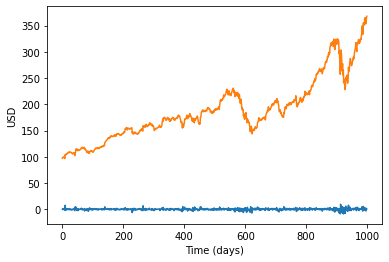

In [116]:
t = np.arange(0, len(stocks['o']), 1)

deltas = []
prev = stocks['o'][0]
for stock in stocks['o']:
    deltas.append((stock - prev) * 100 / prev)
    prev = stock

plt.xlabel('Time (days)')
plt.ylabel('USD')
plt.plot(t, deltas)
plt.plot(t, stocks['o'])
plt.show()

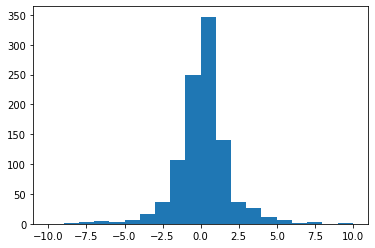

In [117]:
plt.hist(deltas, bins=20, range=(-10, 10))
plt.show()

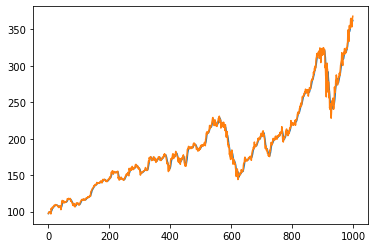

In [118]:
avgs = []
for i in range(len(stocks['o'])): avgs.append(moving_average(stocks['o'], 5, i))
plt.plot(t, avgs)
plt.plot(t, stocks['o'])
plt.savefig('aapl.png', figsize=(8, 6), dpi=200)
plt.show()

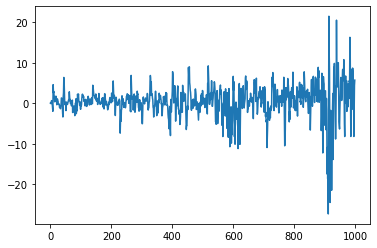

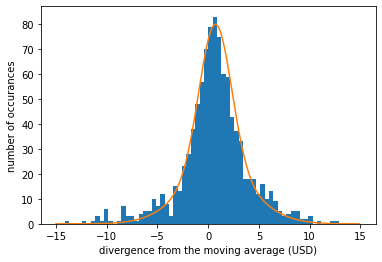

In [157]:
diffs = []
for i in range(len(stocks['o'])): diffs.append(stocks['o'][i] - avgs[i])
plt.plot(t, diffs)
plt.show()

plt.xlabel('divergence from the moving average (USD)')
plt.ylabel('number of occurances')
plt.hist(diffs, range=(-15, 15), bins=70)

_diffs = np.arange(-15, 15, 0.1)
plt.plot(_diffs, 60 * np.exp(-0.20*(_diffs - 0.7)**2) + 20 * np.exp(-0.04*(_diffs - 0.85)**2))

plt.show()